# WINE QUALITY PREDICTION

INTRODUCTION  

For this project, I used Kaggle’s Wine Quality dataset to build various classification models to predict whether a particular  wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. The quality of a wine is determined by 11 input variables:

1.Fixed acidity

2.Volatile acidity

3.Citric acid

4.Residual sugar

5.Chlorides

6.Free sulfur dioxide

7.Total sulfur dioxide

8.Density

9.pH

10.Sulfates

11.Alcohol

Output variable (based on sensory data):

12.quality (score between 0 and 10)

OBJECTIVES

1.To experiment with different classification methods to see which yields the highest accuracy.

2.To determine which features are the most indicative of a good quality wine.


In [1]:
#Installing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pip install xgboost


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
 
import warnings
warnings.filterwarnings('ignore')

# Creating DataFrame

In [2]:
#LOAD the DATA
wine_quality = pd.read_csv(r'C:\Users\dell\Downloads\winequalityN.csv')
wine_quality.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [3]:
# Finding number or rows and columns
wine_quality.shape

(6497, 13)

In [4]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
#Describing the Dataset
wine_quality.describe().T


count        mean        std      min       25%  \
fixed acidity         6487.0    7.216579   1.296750  3.80000   6.40000   
volatile acidity      6489.0    0.339691   0.164649  0.08000   0.23000   
citric acid           6494.0    0.318722   0.145265  0.00000   0.25000   
residual sugar        6495.0    5.444326   4.758125  0.60000   1.80000   
chlorides             6495.0    0.056042   0.035036  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6488.0    3.218395   0.160748  2.72000   3.11000   
sulphates             6493.0    0.531215   0.148814  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [6]:
set(wine_quality['quality'])

{3, 4, 5, 6, 7, 8, 9}

In [7]:
# checking every value in columns which are "null"
wine_quality.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
# dropping all the rows which have null values
wine_quality.dropna(inplace = True)
wine_quality.update(wine_quality.fillna(wine_quality.mean()))

In [9]:
wine_quality.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# cheking the percentage of 'types' of wines
wine_quality['type'].value_counts(normalize = True)

white    0.75352
red      0.24648
Name: type, dtype: float64

In [11]:
# classifying all the 'quality' and their count 
wine_quality['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

# EDA

In [12]:
# For analysis of Numerical variables
num_cols = wine_quality.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables:")
print(num_cols)

Numerical Variables:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


fixed acidity
Skew : 1.72


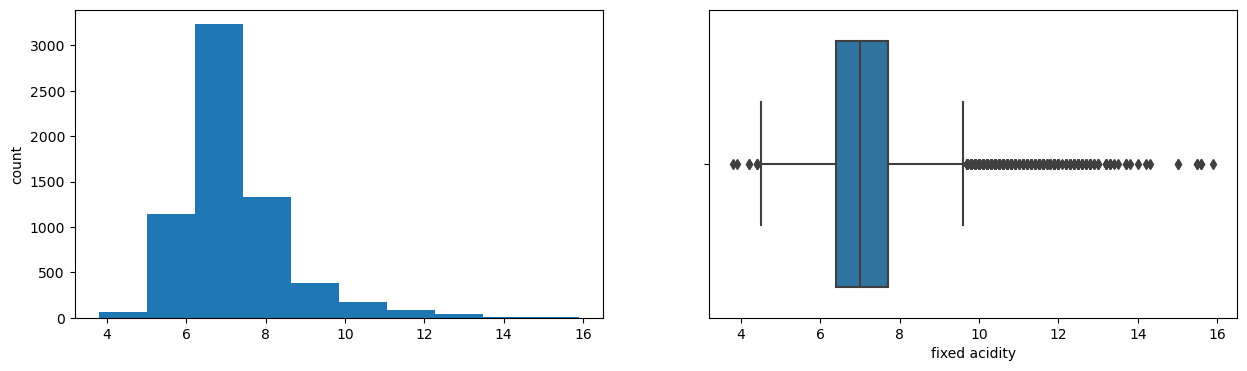

volatile acidity
Skew : 1.5


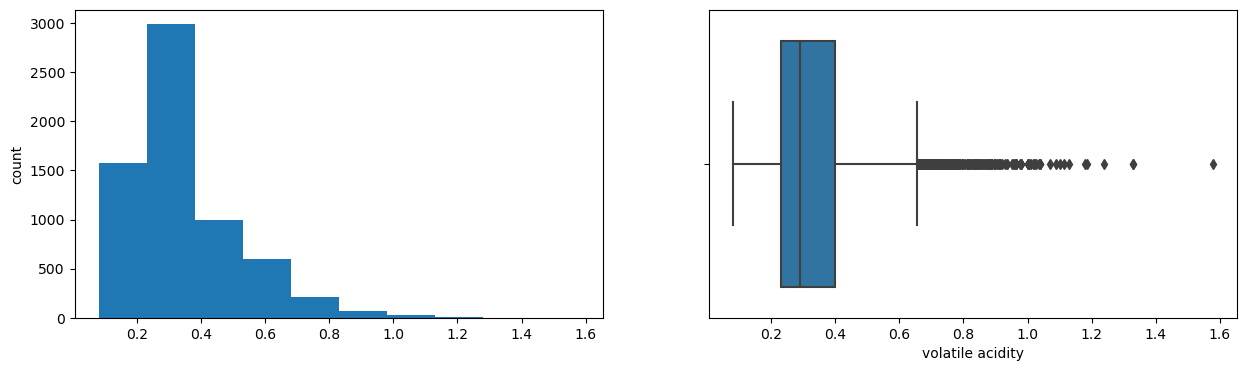

citric acid
Skew : 0.47


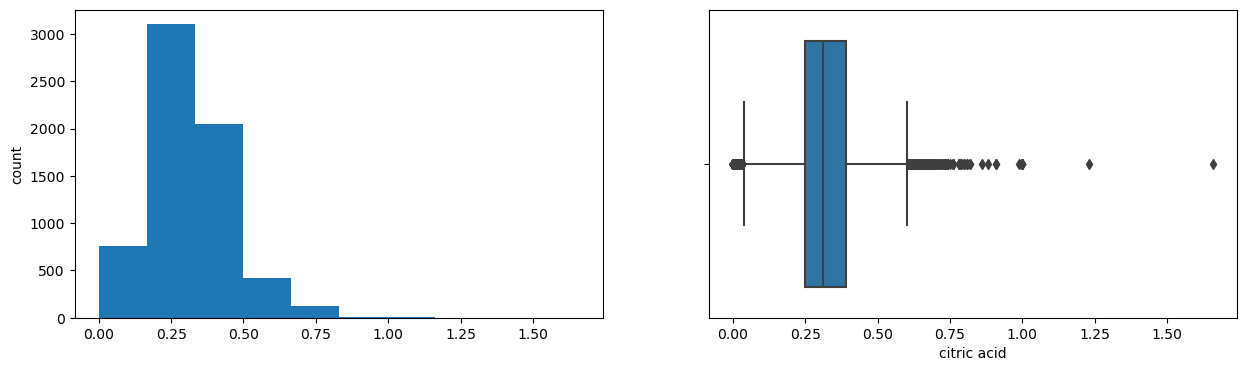

residual sugar
Skew : 1.44


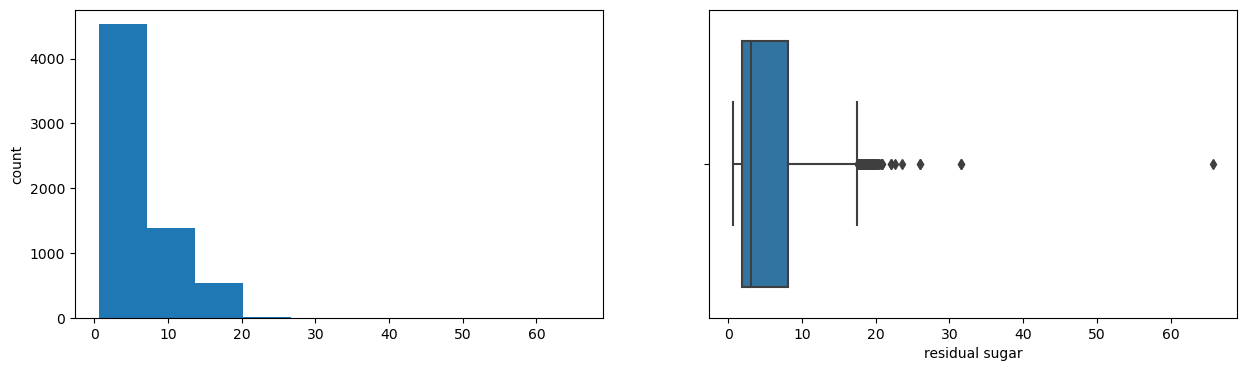

chlorides
Skew : 5.4


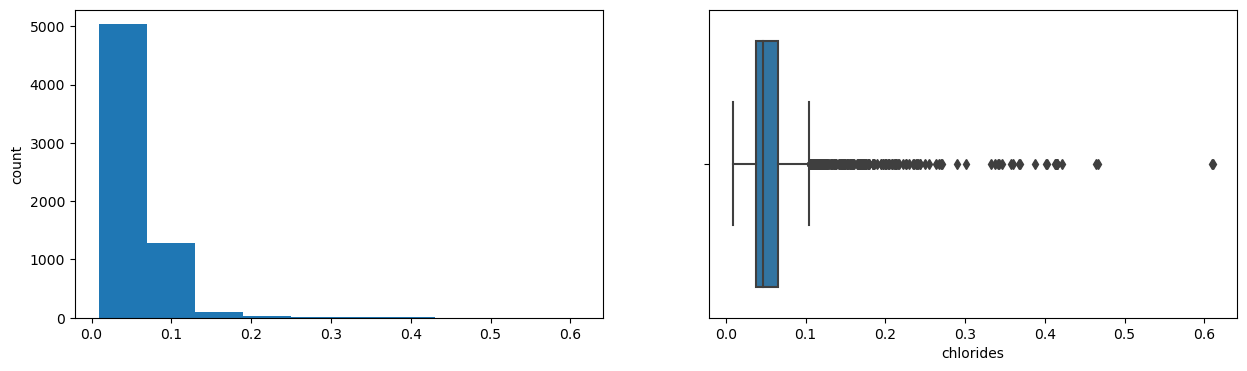

free sulfur dioxide
Skew : 1.22


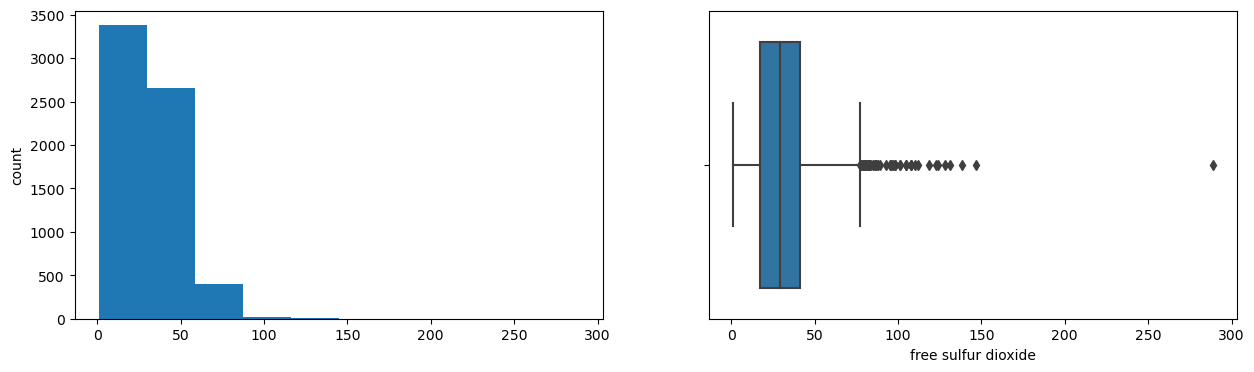

total sulfur dioxide
Skew : -0.0


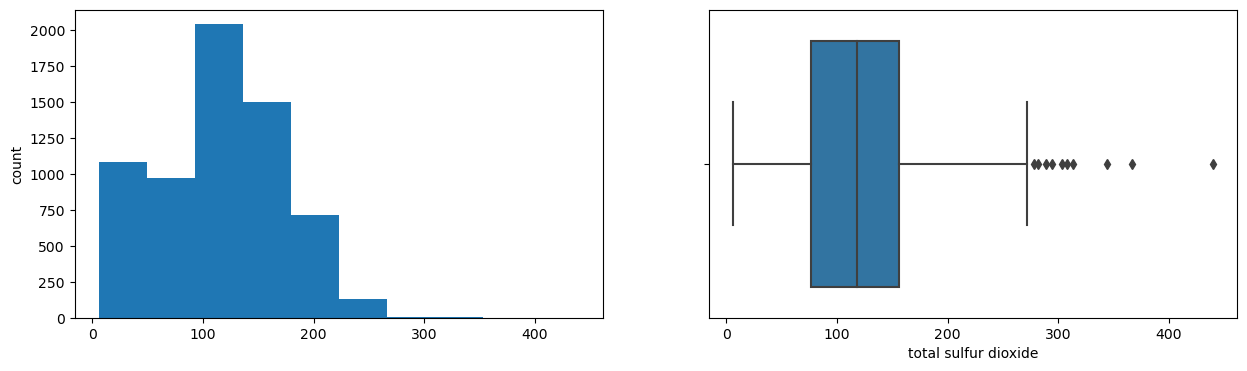

density
Skew : 0.5


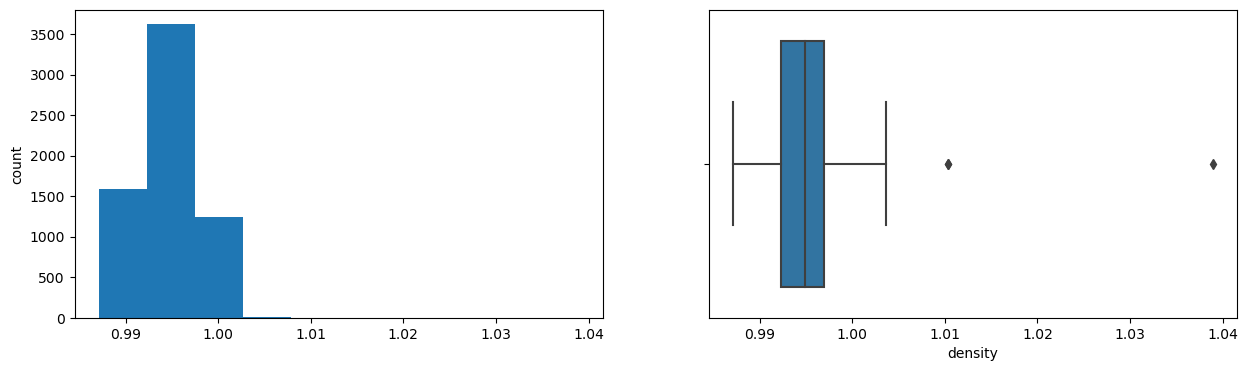

pH
Skew : 0.39


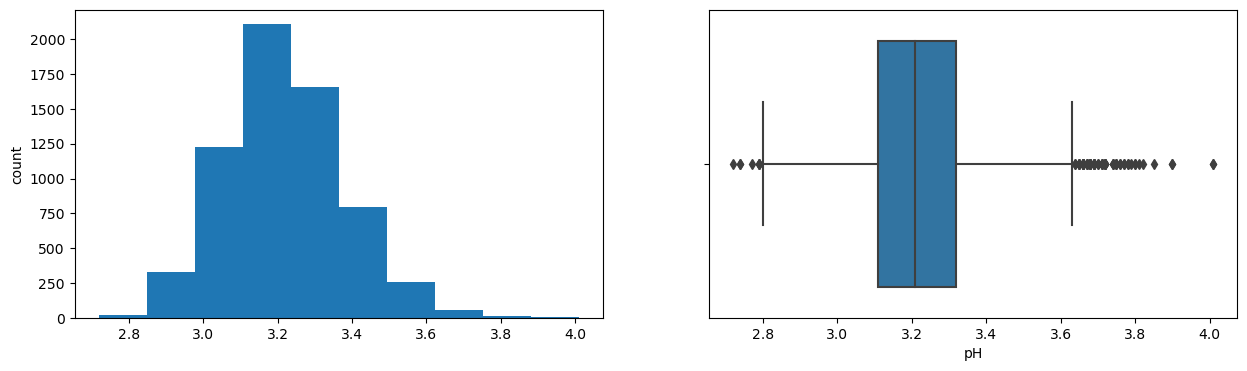

sulphates
Skew : 1.8


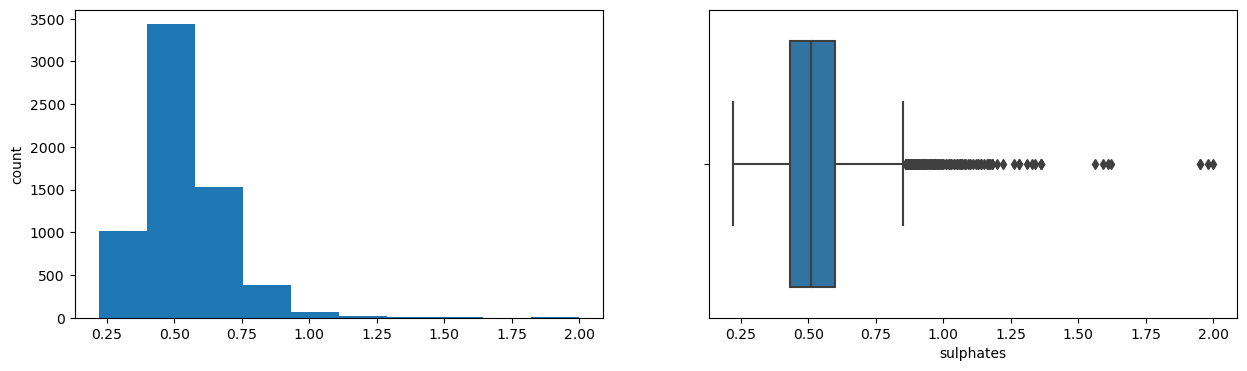

alcohol
Skew : 0.57


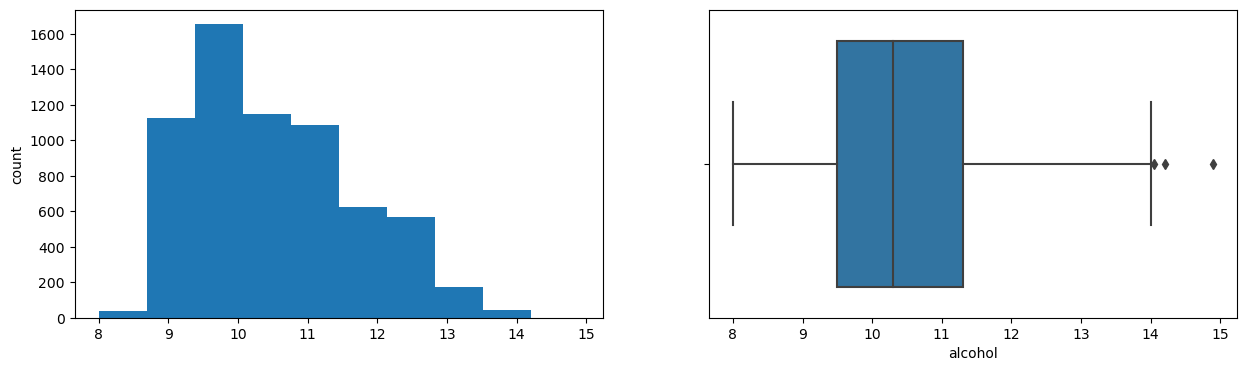

quality
Skew : 0.19


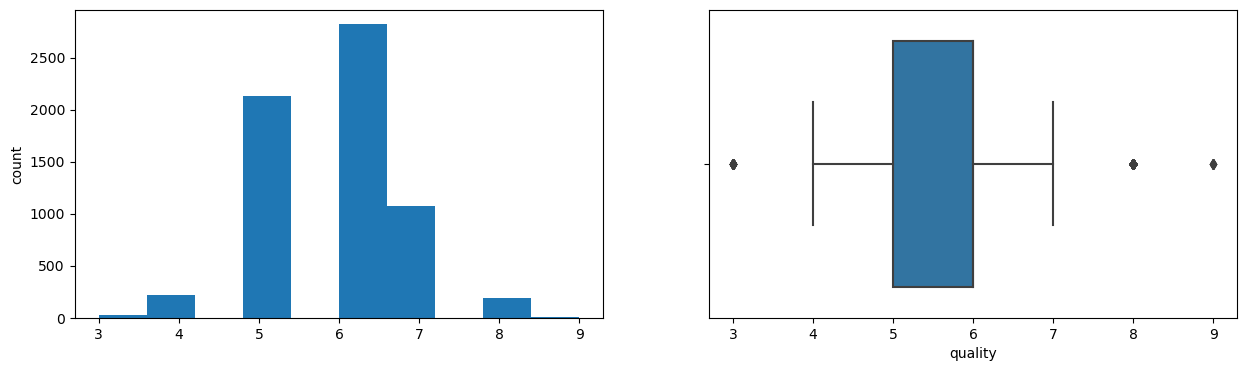

In [13]:
#Ploting histrogram and boxplot 
for col in num_cols:
    print(col)
    print('Skew :', round(wine_quality[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    wine_quality[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=wine_quality[col])
    plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

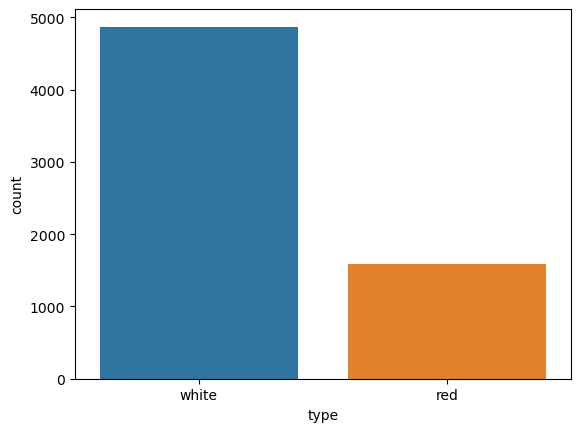

In [14]:
# using the BARPLOT to check the differnt "type"s of wines and their counts
sns.countplot(x = "type", data = wine_quality)

<AxesSubplot:xlabel='quality', ylabel='count'>

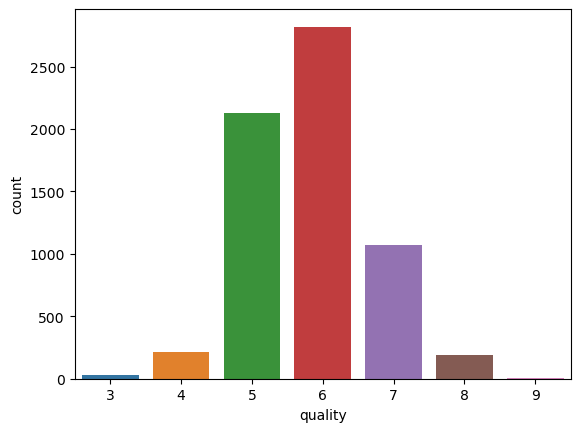

In [15]:
# using the COUNTPLOT to check the differnt "quality"s of wines and their counts
sns.countplot(x = "quality", data = wine_quality)

<AxesSubplot:>

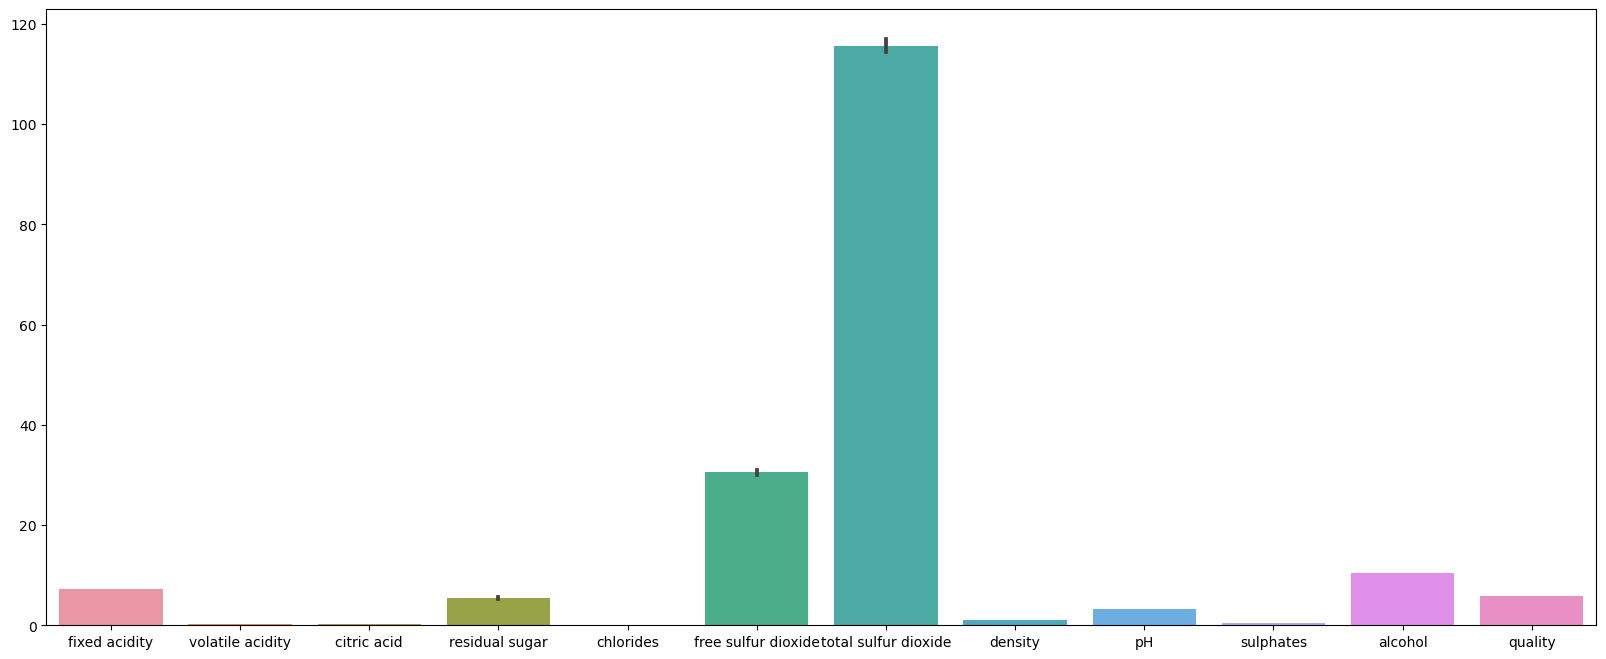

In [16]:
#BarPlot 
plt.figure(figsize = (20,8))
sns.barplot(data = wine_quality)

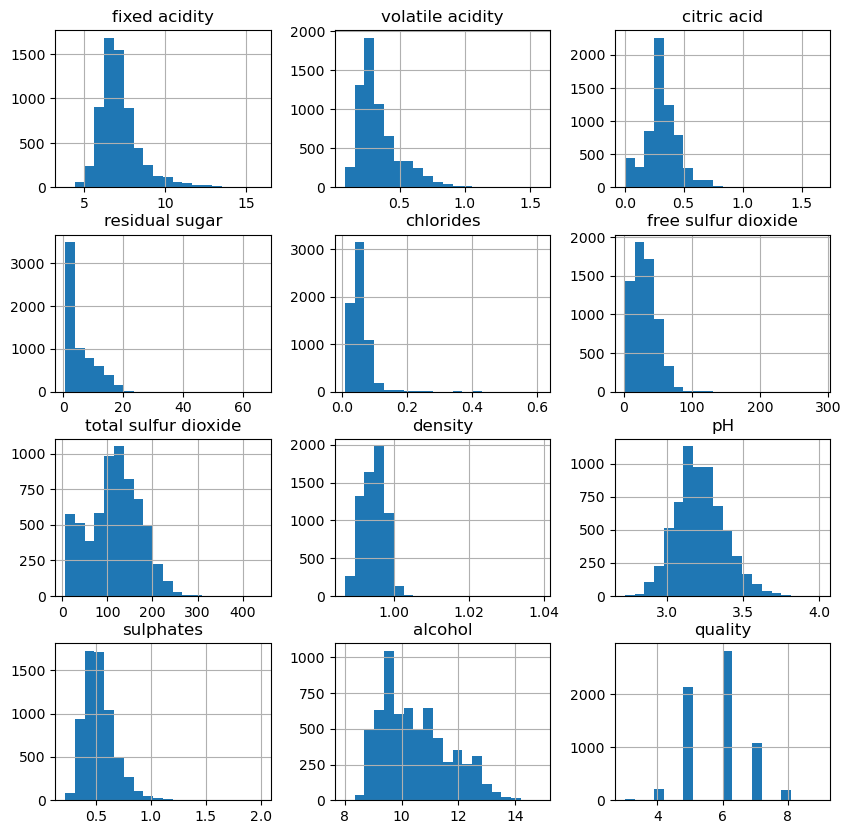

In [17]:
#HISTROGRAM
wine_quality.hist(bins=20, figsize=(10, 10))
plt.show()

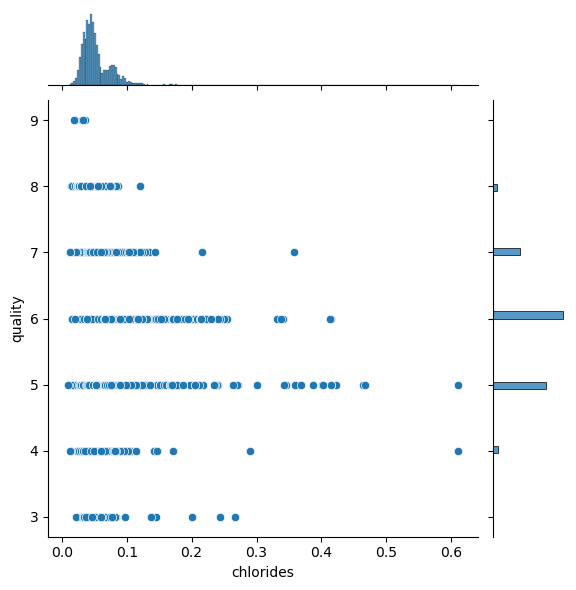

In [18]:
#JOINTPLOT
sns.jointplot(x ='chlorides', y ='quality', data = wine_quality)

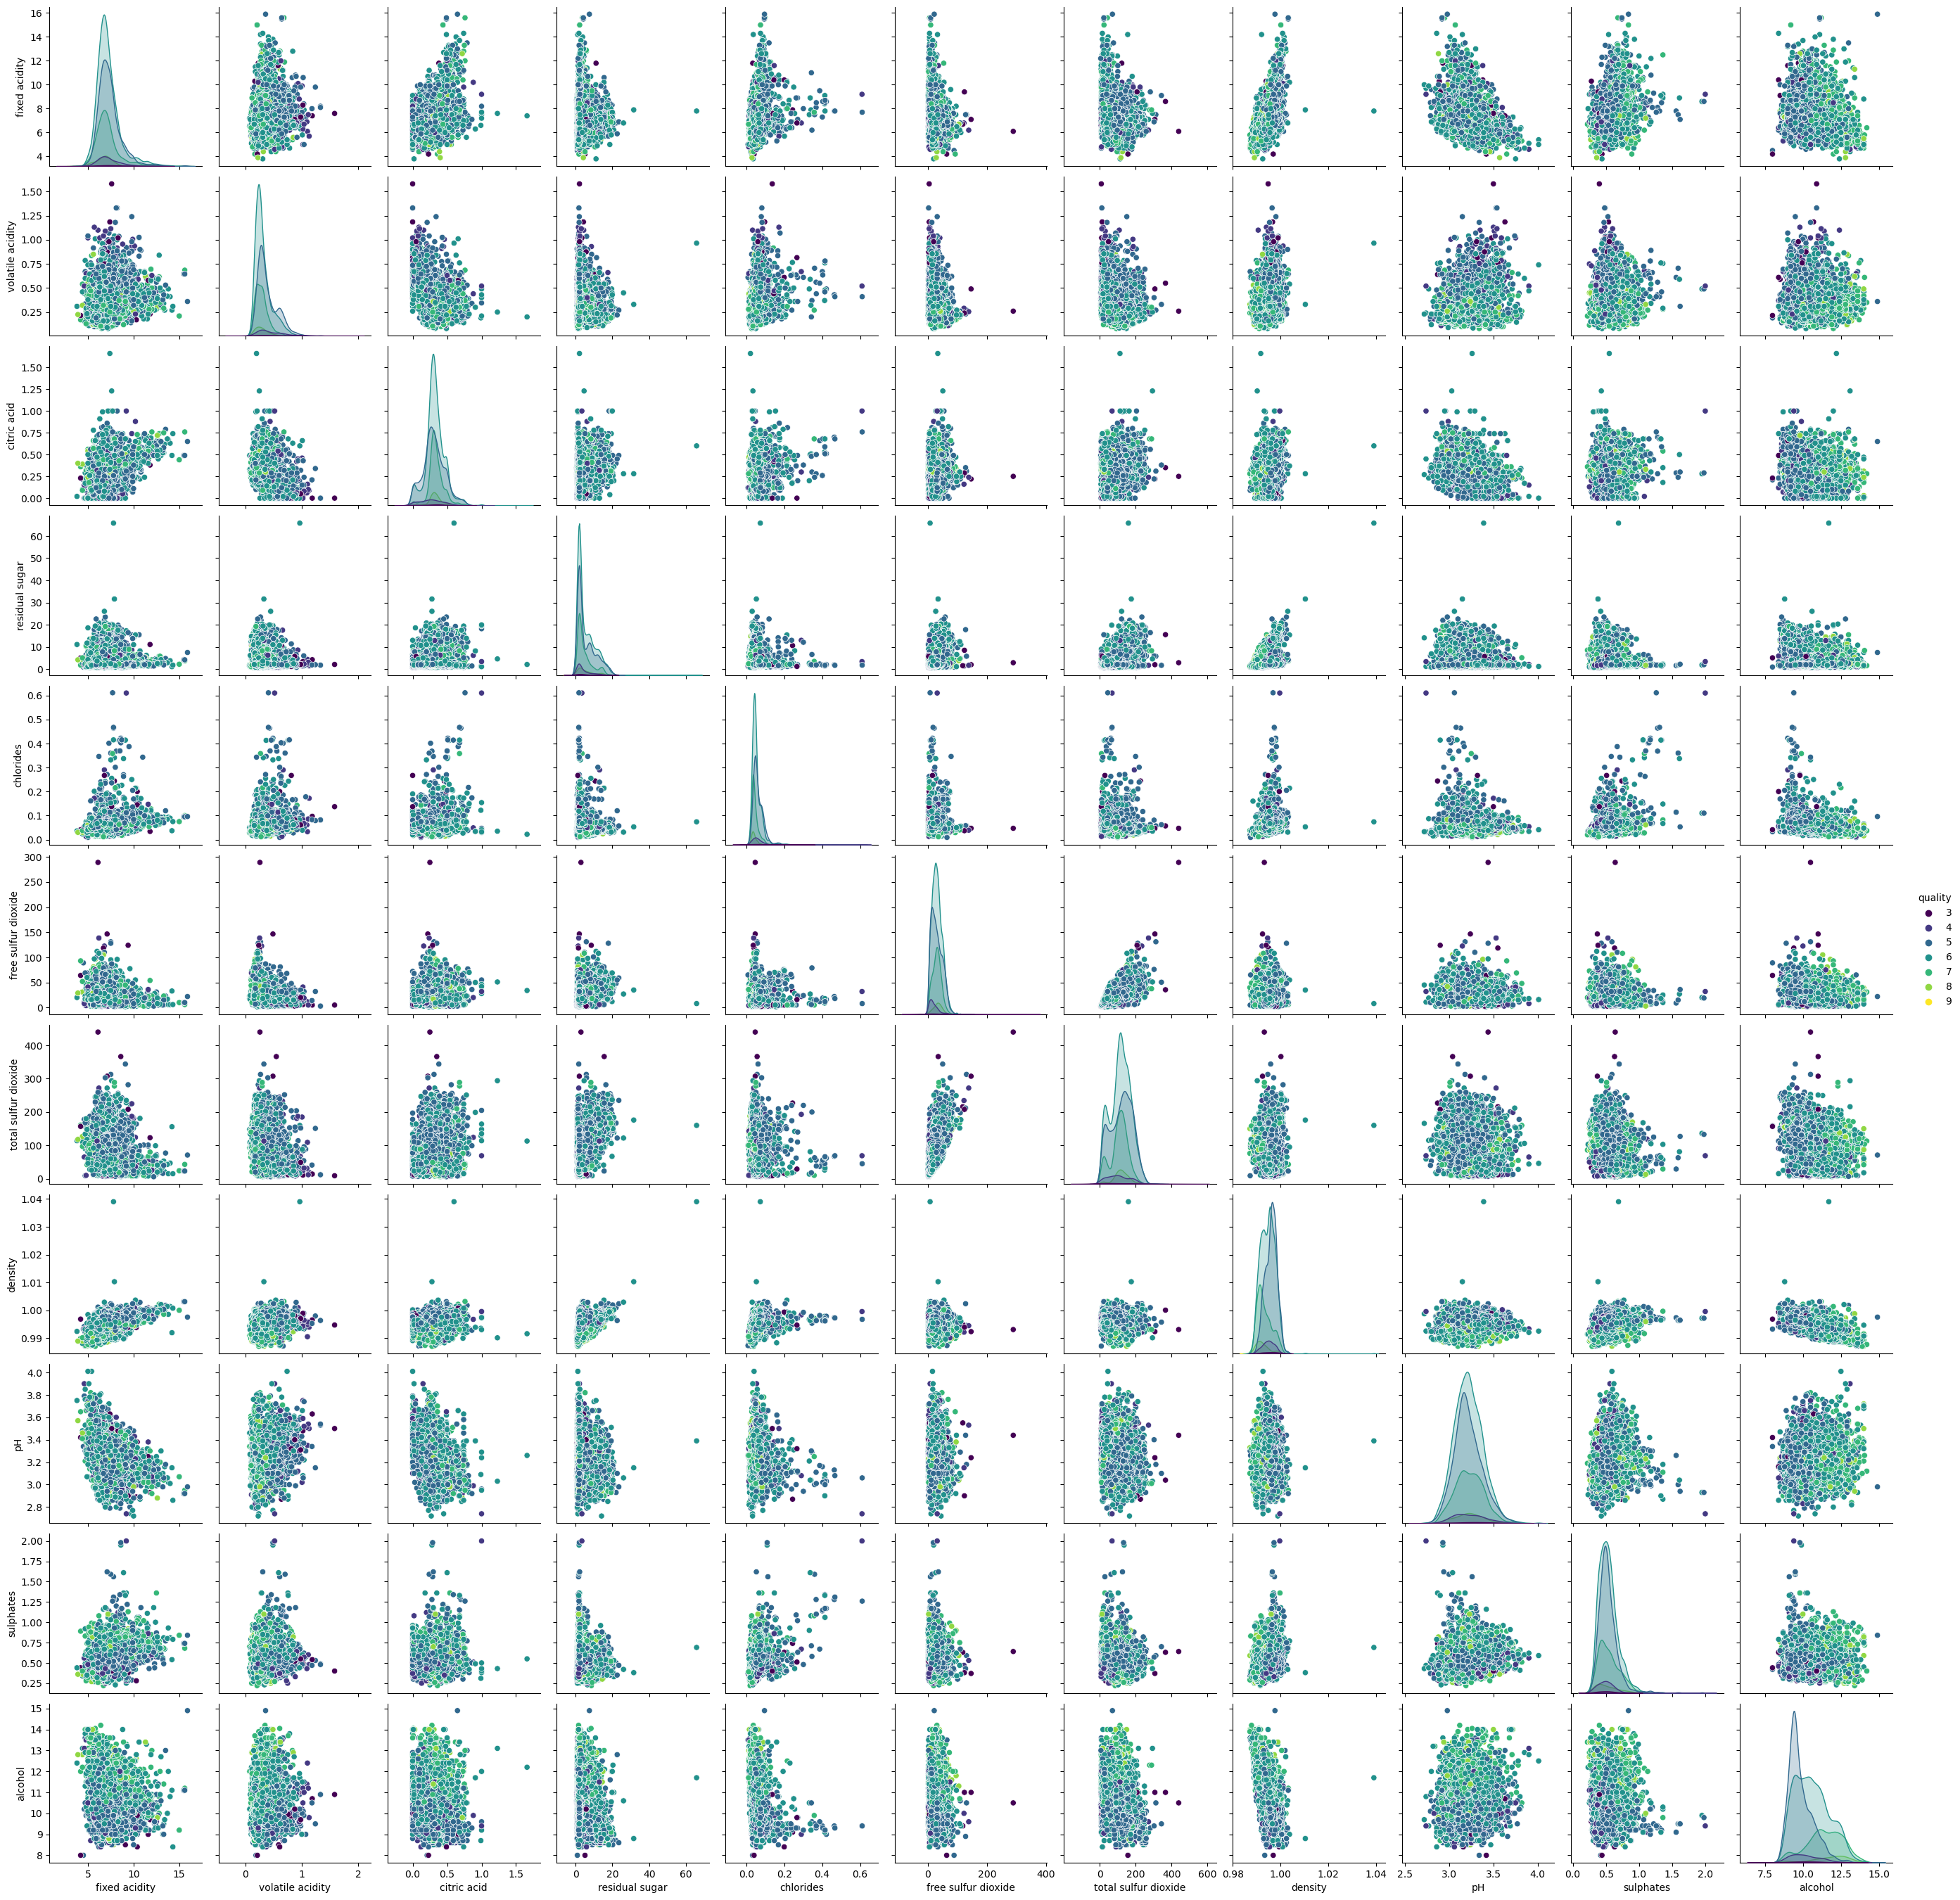

In [19]:
#PAIRPLOT
sns.pairplot(wine_quality,hue='quality', palette='viridis')

# Plotting Heatmap using the correlated result

In [20]:
wine_quality.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.221066     0.323744   
volatile acidity           0.221066          1.000000    -0.377512   
citric acid                0.323744         -0.377512     1.000000   
residual sugar            -0.113442         -0.196677     0.142324   
chlorides                  0.299104          0.377995     0.039412   
free sulfur dioxide       -0.283485         -0.353402     0.132271   
total sulfur dioxide      -0.330543         -0.414729     0.194398   
density                    0.459713          0.272101     0.097068   
pH                        -0.251121          0.260134    -0.327860   
sulphates                  0.301263          0.225656     0.059070   
alcohol                   -0.096190         -0.039528    -0.010056   
quality                   -0.076174         -0.266677     0.084926   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.113442   0.299104            -0.283485   
volatile acidity           -0.196677   0.377995            -0.353402   
citric acid                 0.142324   0.039412             0.132271   
residual sugar              1.000000  -0.128814             0.403449   
chlorides                  -0.128814   1.000000            -0.195428   
free sulfur dioxide         0.403449  -0.195428             1.000000   
total sulfur dioxide        0.495684  -0.279602             0.721476   
density                     0.551494   0.363108             0.025113   
pH                         -0.266481   0.044653            -0.145164   
sulphates                  -0.185616   0.396240            -0.188947   
alcohol                    -0.359132  -0.257664            -0.179477   
quality                    -0.034654  -0.200553             0.054924   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.330543  0.459713 -0.251121   0.301263   
volatile acidity                 -0.414729  0.272101  0.260134   0.225656   
citric acid                       0.194398  0.097068 -0.327860   0.059070   
residual sugar                    0.495684  0.551494 -0.266481  -0.185616   
chlorides                        -0.279602  0.363108  0.044653   0.396240   
free sulfur dioxide               0.721476  0.025113 -0.145164  -0.188947   
total sulfur dioxide              1.000000  0.031419 -0.237204  -0.275878   
density                           0.031419  1.000000  0.012525   0.260019   
pH                               -0.237204  0.012525  1.000000   0.190864   
sulphates                        -0.275878  0.260019  0.190864   1.000000   
alcohol                          -0.264385 -0.687432  0.120473  -0.004116   
quality                          -0.041598 -0.304447  0.018403   0.039054   

                       alcohol   quality  
fixed acidity        -0.096190 -0.076174  
volatile acidity     -0.039528 -0.266677  
citric acid          -0.010056  0.084926  
residual sugar       -0.359132 -0.034654  
chlorides            -0.257664 -0.200553  
free sulfur dioxide  -0.179477  0.054924  
total sulfur dioxide -0.264385 -0.041598  
density              -0.687432 -0.304447  
pH                    0.120473  0.018403  
sulphates            -0.004116  0.039054  
alcohol               1.000000  0.444637  
quality               0.444637  1.000000

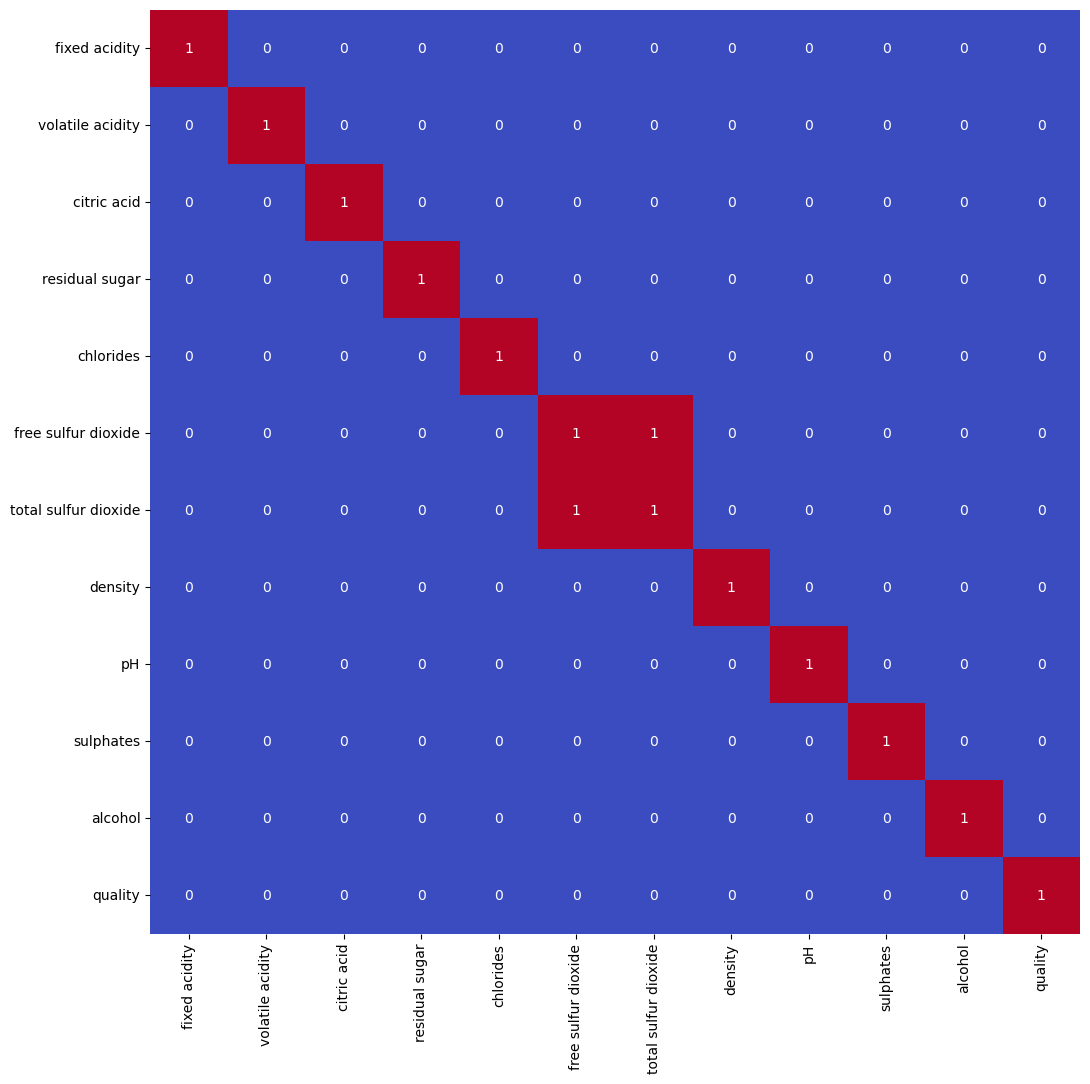

In [21]:
plt.figure(figsize=(12, 12))
sns.heatmap(wine_quality.corr() > 0.7, annot=True, cbar=False,cmap="coolwarm")
plt.show()


In [22]:
quality_new = wine_quality.drop('total sulfur dioxide', axis=1)


In [23]:
quality_new

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  \
0         0.045                 45.0  1.00100  3.00       0.45      8.8   
1         0.049                 14.0  0.99400  3.30       0.49      9.5   
2         0.050                 30.0  0.99510  3.26       0.44     10.1   
3         0.058                 47.0  0.99560  3.19       0.40      9.9   
4         0.058                 47.0  0.99560  3.19       0.40      9.9   
...         ...                  ...      ...   ...        ...      ...   
6491      0.068                 28.0  0.99651  3.42       0.82      9.5   
6492      0.090                 32.0  0.99490  3.45       0.58     10.5   
6494      0.076                 29.0  0.99574  3.42       0.75     11.0   
6495      0.075                 32.0  0.99547  3.57       0.71     10.2   
6496      0.067                 18.0  0.99549  3.39       0.66     11.0   

      quality  
0           6  
1           6  
2           6  
3           6  
4           6  
...       ...  
6491        6  
6492        5  
6494        6  
6495        5  
6496        6  

[6463 rows x 12 columns]

In [24]:
quality_ml = pd.get_dummies(quality_new, drop_first = True)

In [25]:
quality_ml

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0                    45.0  1.00100  3.00       0.45      8.8        6   
1                    14.0  0.99400  3.30       0.49      9.5        6   
2                    30.0  0.99510  3.26       0.44     10.1        6   
3                    47.0  0.99560  3.19       0.40      9.9        6   
4                    47.0  0.99560  3.19       0.40      9.9        6   
...                   ...      ...   ...        ...      ...      ...   
6491                 28.0  0.99651  3.42       0.82      9.5        6   
6492                 32.0  0.99490  3.45       0.58     10.5        5   
6494                 29.0  0.99574  3.42       0.75     11.0        6   
6495                 32.0  0.99547  3.57       0.71     10.2        5   
6496                 18.0  0.99549  3.39       0.66     11.0        6   

      type_white  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
6491           0  
6492           0  
6494           0  
6495           0  
6496           0  

[6463 rows x 12 columns]

In [26]:
quality_ml.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
type_white             0
dtype: int64

In [27]:
y = quality_ml['quality'].apply(lambda y:1 if y>7 else 0)

In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

In [29]:
X = quality_ml.drop('quality', axis = 1)

In [30]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density    pH  sulphates  alcohol  type_white  
0                    45.0  1.00100  3.00       0.45      8.8           1  
1                    14.0  0.99400  3.30       0.49      9.5           1  
2                    30.0  0.99510  3.26       0.44     10.1           1  
3                    47.0  0.99560  3.19       0.40      9.9           1  
4                    47.0  0.99560  3.19       0.40      9.9           1  
...                   ...      ...   ...        ...      ...         ...  
6491                 28.0  0.99651  3.42       0.82      9.5           0  
6492                 32.0  0.99490  3.45       0.58     10.5           0  
6494                 29.0  0.99574  3.42       0.75     11.0           0  
6495                 32.0  0.99547  3.57       0.71     10.2           0  
6496                 18.0  0.99549  3.39       0.66     11.0           0  

[6463 rows x 11 columns]

In [31]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

In [32]:
X = X_standard

In [33]:
X

array([[-0.16778609, -0.42270958,  0.2839587 , ..., -0.5449872 ,
        -1.41892232,  0.5719307 ],
       [-0.70715516, -0.2404789 ,  0.14625658, ..., -0.27635393,
        -0.83218392,  0.5719307 ],
       [ 0.67979387, -0.36196602,  0.55936296, ..., -0.61214551,
        -0.32926528,  0.5719307 ],
       ...,
       [-0.70715516,  1.03513588, -1.29961576, ...,  1.46976231,
         0.42511267, -1.74846359],
       [-1.01536606,  1.85517396, -1.36846682, ...,  1.20112905,
        -0.24544551, -1.74846359],
       [-0.93831333, -0.17973534,  1.0413204 , ...,  0.86533746,
         0.42511267, -1.74846359]])

In [34]:
#Train-Test Split 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .2, random_state = 245)

In [35]:
models = [LogisticRegression(),XGBClassifier(),DecisionTreeClassifier(),SVC(kernel='rbf')]

for i in range(4):
    
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_test, models[i].predict(X_test)))
    print()


LogisticRegression() : 
Training Accuracy :  0.5
Validation Accuracy :  0.49960191082802546

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.6744814081597521

DecisionTreeClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.

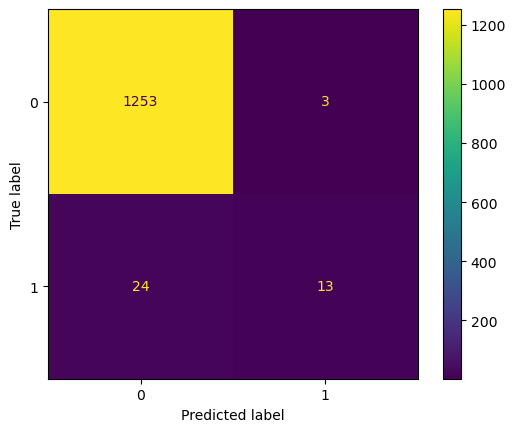

In [36]:
#Confusion matrix
metrics.plot_confusion_matrix(models[1], X_test, Y_test)
plt.show()


In [37]:
#Classification Report
print(metrics.classification_report(Y_test,models[1].predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1256
           1       0.81      0.35      0.49        37

    accuracy                           0.98      1293
   macro avg       0.90      0.67      0.74      1293
weighted avg       0.98      0.98      0.98      1293



In [38]:
print(metrics.accuracy_score(Y_test,models[1].predict(X_test)))


0.9791183294663574


# Random Forest

In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(rfc_pred, Y_test)

0.9806651198762568

In [43]:
#Calculating Cross_val_score
def return_score(rfc,X_train, X_test, Y_train, Y_test):
    rfc.fit(X_train, Y_train)
    score = rfc.score(X_test, Y_test)
    return score

scores = []
#Try StratifiedK-Fold (Stratified5-Fold)
#cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=False)
#Try K-Fold (5-Fold)
cv = KFold(n_splits=5, shuffle=False) 
for train_index, test_index in cv.split(X,y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)
    score = return_score(rfc,X_train, X_test, Y_train, Y_test)    
    scores.append(score)

print("Accuracy score in each iteration: {}".format(scores))
print("K-Fold Score: {}".format(np.mean(scores)))

Accuracy score in each iteration: [0.9837587006960556, 0.9791183294663574, 0.974477958236659, 0.9845320959010054, 0.9752513534416086]
K-Fold Score: 0.9794276875483373


In [44]:
print(classification_report(rfc_pred, Y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1279
           1       0.00      0.00      0.00        14

    accuracy                           0.95      1293
   macro avg       0.49      0.48      0.49      1293
weighted avg       0.98      0.95      0.97      1293



In [45]:
print(confusion_matrix(rfc_pred, Y_test))

[[1234   45]
 [  14    0]]


# FEATURE IMPORTANCE

In [46]:
rfc.feature_importances_

array([0.08793003, 0.08807836, 0.08275709, 0.10574666, 0.09393845,
       0.11151536, 0.11366308, 0.0947664 , 0.10670493, 0.11199421,
       0.00290543])

<AxesSubplot:>

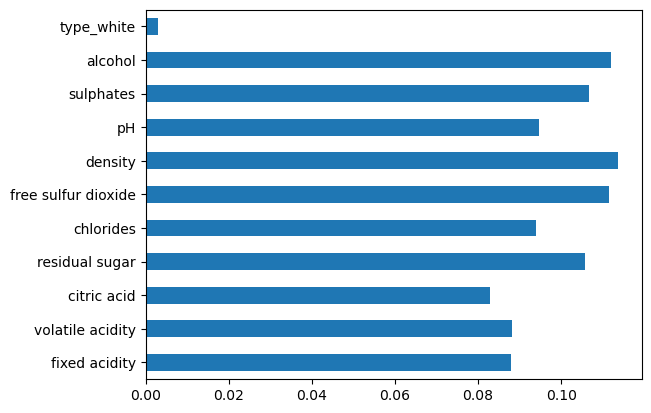

In [56]:
pd.Series(rfc.feature_importances_, index = quality_ml.drop('quality', axis = 1).columns).plot(kind ='barh')


# Input and Reshaping

In [48]:
pred_test = wine_quality.iloc[5]
pred_test

type                     white
fixed acidity              8.1
volatile acidity          0.28
citric acid                0.4
residual sugar             6.9
chlorides                 0.05
free sulfur dioxide       30.0
total sulfur dioxide      97.0
density                 0.9951
pH                        3.26
sulphates                 0.44
alcohol                   10.1
quality                      6
Name: 5, dtype: object

In [49]:
pred_test['type'] = 1
pred_test.drop(['quality', 'total sulfur dioxide'], inplace = True)
pred_test

type                        1
fixed acidity             8.1
volatile acidity         0.28
citric acid               0.4
residual sugar            6.9
chlorides                0.05
free sulfur dioxide      30.0
density                0.9951
pH                       3.26
sulphates                0.44
alcohol                  10.1
Name: 5, dtype: object

In [50]:
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [51]:
#Predicton for Random Forest
y_pred_test_output = rfc.predict(pred_test_std)
y_pred_test_output


array([0], dtype=int64)

# Saving Model

In [52]:
import pickle

In [53]:
filename = "rfc.pkl"
pickle.dump(rfc, open(filename, 'wb'))
print("Saved the Model")

Saved the Model
